
# Deep Learning, MSc in Data Science

## Assignment 1: A Simple Classification Network



First of all we have to import all the libraries needed

In [1]:
import numpy as np
import keras
import tensorflow as tf
import pickle as pickle
from keras.utils import np_utils
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.optimizers import Nadam
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import backend as k 
import os, sys
import urllib
import tarfile
from scipy.stats.mstats import zscore

%matplotlib inline    

Using TensorFlow backend.


# Loading the Dataset

The functions below will perform loading of the training and test files 

In [2]:
def load_files(batch_file):
    with open(os.path.join("/home/mscuser/Desktop/deep_learning/cifar-10-batches-py/", batch_file), mode='rb') as file:    
        file_data = pickle.load(file)
    image = file_data['data']
    labels = np.array(file_data['labels'])
    reshaped_img = np.rollaxis(image.reshape([-1, 3, 32, 32]), 1, 4)
    return reshaped_img, labels

def load_training_test_files():
    training_img = np.zeros(shape=(50000, 32, 32, 3), dtype=int)
    training_label = np.zeros(shape=(50000), dtype=int)
    test_img, test_label = load_files(batch_file="test_batch")
    
    start = 0
    for i in range(1, 6):
        batch_img, batch_ctg = load_files(batch_file="data_batch_" + str(i))
        num_img = len(batch_img)
        end = start + num_img
        training_img[start:end, :] = batch_img
        training_label[start:end] = batch_ctg
        start = end
        
    return training_img, np_utils.to_categorical(training_label, 10), test_img, np_utils.to_categorical(test_label, 10)

In [3]:
X_train, Y_train, X_test, Y_test= load_training_test_files()

# Data Preproccessing 

1. According to the template code we have to normalize the data to range 0.0 - 1.0 
2. Split training to training and validation (70%, 30%)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

We will plot the images till now

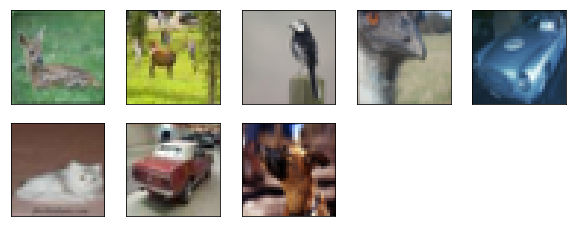

In [6]:
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

# Model Selection Process

The functions below will be used in order to train and evaluate our models

In [7]:
def modelSelection(model, a, b, classes, optimizer):
    
    model.add(Flatten(input_shape=(32, 32, 3))) 
    model.add(Dense(a, activation='relu'))
    model.add(Dense(b, activation='sigmoid'))
    model.add(Dense(classes, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

In [20]:
def modelSelection_2layers(model, classes, optimizer):
    
    model.add(Flatten(input_shape=(32, 32, 3))) 
    model.add(Dense(30, activation='relu'))
    model.add(Dense(classes, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

In [24]:
def modelSelection_Dropout(model, classes, optimizer):
    
    model.add(Flatten(input_shape=(32, 32, 3))) 
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))  
    model.add(Dense(classes, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

In [8]:
def modelEvaluation(model, epochs):
    
    modelFit = model.fit(X_train, Y_train, batch_size=256, epochs=epochs, validation_data=(X_valid, Y_valid),shuffle=True, verbose=0) 
    score = model.evaluate(X_test, Y_test)
    print('Loss: ', score[0])
    print('Accuracy', score[1])
    plots(modelFit)

In [9]:
def plots(model_fit):
  
    plt.plot(model_fit.history['acc'])
    plt.plot(model_fit.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(model_fit.history['loss'])
    plt.plot(model_fit.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

We are going to perform experiments using three different optimizers (Adam, SGD, RMSprop). We use the same neural network with an input and 2 hidden layers with 30 neurons.We will use 100 epochs 

 9664/10000 [===========================>..] - ETA: 0s('Loss: ', 1.5439342214584351)
('Accuracy', 0.4541)


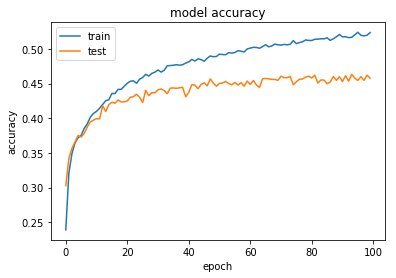

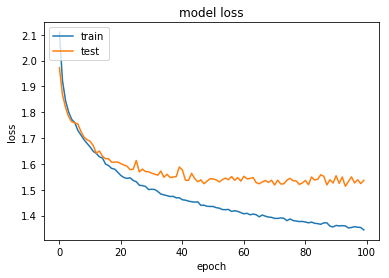

In [10]:
model1 = Sequential()
model_1 = modelSelection(model1, 30, 30, 10, 'Adam')
modelEvaluation(model_1, 100)

 9216/10000 [==========================>...] - ETA: 0s('Loss: ', 1.6509073862075805)
('Accuracy', 0.41789999999999999)


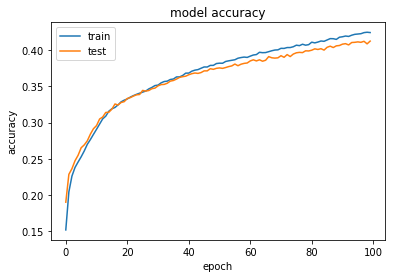

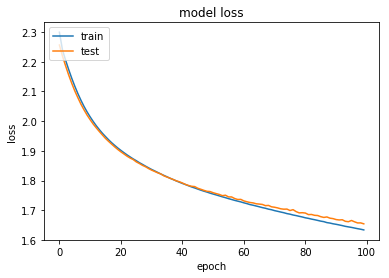

In [11]:
model2 = Sequential()
sgd = optimizers.SGD()
model_2 = modelSelection(model2, 30, 30, 10, sgd)
modelEvaluation(model_2, 100)

 9664/10000 [===========================>..] - ETA: 0s('Loss: ', 1.6601615194320678)
('Accuracy', 0.42120000000000002)


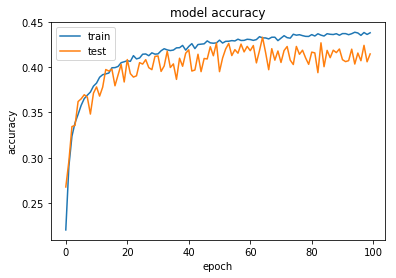

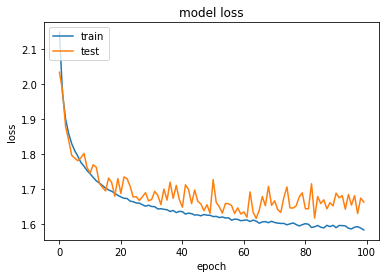

In [12]:
model3 = Sequential()
model_3 = modelSelection(model3, 30, 30, 10, 'RMSprop')
modelEvaluation(model_3, 100)

Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. In the next subsection we are going to change learning rate (0.001, 0.01) and epochs (10, 50, 100) for Adam optimizer. As for the batch size we chose 256 because according to previous work batch size range is 0 to some hundrends. So we decided to take 256 as default value. In future work we should check different values for batch size in order to find the best one.

 9248/10000 [==========================>...] - ETA: 0s('Loss: ', 1.6748224565505982)
('Accuracy', 0.4108)


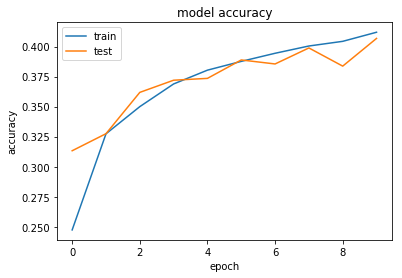

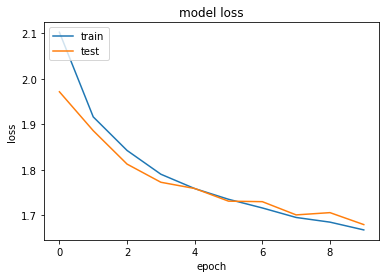

In [13]:
model4 = Sequential()
adam = optimizers.Adam(lr = 0.001)
model_4 = modelSelection(model4, 30, 30, 10, adam)
modelEvaluation(model_4, 10)

 9632/10000 [===========================>..] - ETA: 0s('Loss: ', 1.8447587659835816)
('Accuracy', 0.32740000000000002)


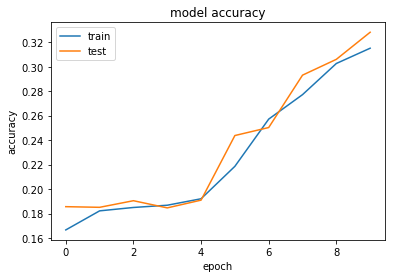

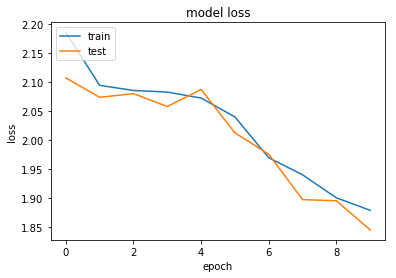

In [14]:
model5 = Sequential()
adam = optimizers.Adam(lr = 0.01)
model_5 = modelSelection(model5, 30, 30, 10, adam)
modelEvaluation(model_5, 10)

 9216/10000 [==========================>...] - ETA: 0s('Loss: ', 1.5793318893432617)
('Accuracy', 0.43859999999999999)


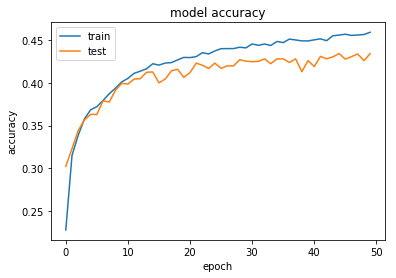

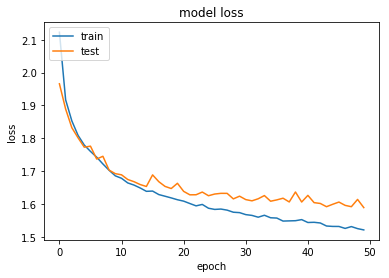

In [15]:
model6 = Sequential()
adam = optimizers.Adam(lr = 0.001)
model_6 = modelSelection(model6, 30, 30, 10, adam)
modelEvaluation(model_6, 50)

10000/10000 [==============================] - 0s     
('Loss: ', 1.739965238380432)
('Accuracy', 0.3785)


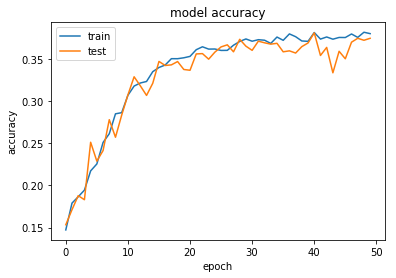

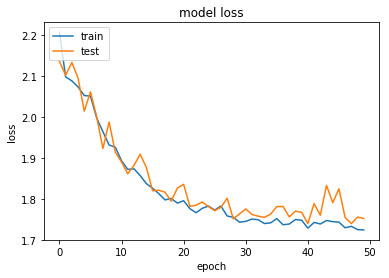

In [16]:
model7 = Sequential()
adam = optimizers.Adam(lr = 0.01)
model_7 = modelSelection(model7, 30, 30, 10, adam)
modelEvaluation(model_7, 50)

 9600/10000 [===========================>..] - ETA: 0s('Loss: ', 1.7683558206558228)
('Accuracy', 0.36420000000000002)


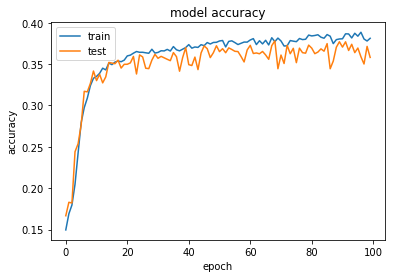

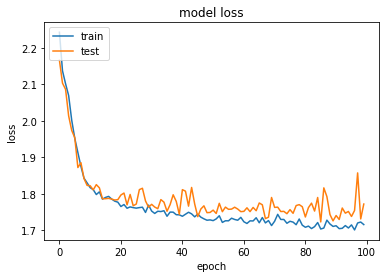

In [18]:
model9 = Sequential()
adam = optimizers.Adam(lr = 0.01)
model_9 = modelSelection(model9, 30, 30, 10, adam)
modelEvaluation(model_9, 100)

As for the hidden layers of the neural, we are going to see if we increase accuracy by eleminating one of the hidden layers or by changing the density of our layers.

 9344/10000 [===========================>..] - ETA: 0s('Loss: ', 1.7130261564254761)
('Accuracy', 0.38369999999999999)


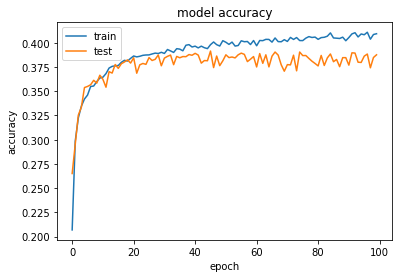

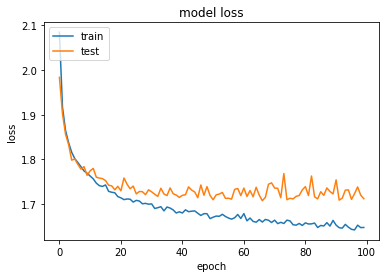

In [21]:
model10 = Sequential()
adam = optimizers.Adam()
model_10 = modelSelection_2layers(model10, 10, adam)
modelEvaluation(model_10, 100)

 9984/10000 [============================>.] - ETA: 0s('Loss: ', 1.5488509826660157)
('Accuracy', 0.49640000000000001)


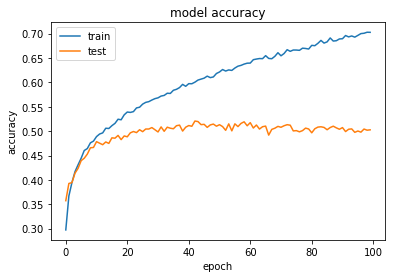

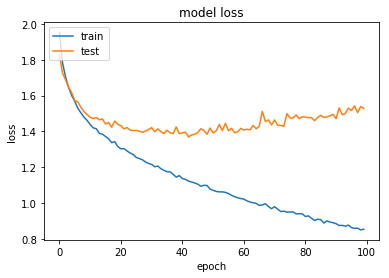

In [22]:
model11 = Sequential()
adam = optimizers.Adam()
model_11 = modelSelection(model11, 128, 128, 10, adam)
modelEvaluation(model_11, 100)

 9952/10000 [============================>.] - ETA: 0s('Loss: ', 1.7215462118148803)
('Accuracy', 0.50980000000000003)


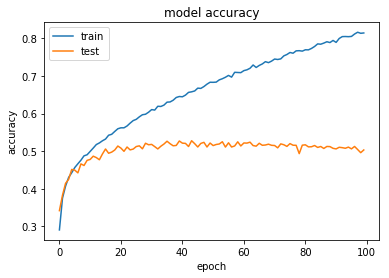

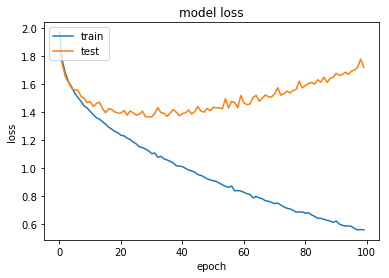

In [23]:
model12 = Sequential()
adam = optimizers.Adam()
model_12 = modelSelection(model12, 300, 128, 10, adam)
modelEvaluation(model_12, 100)

We will also check if our model is improved by randomly drop some units from the neural (Dropout). In this way we force each neuron to rely more on its own.

 9888/10000 [============================>.] - ETA: 0s('Loss: ', 1.4829769863128661)
('Accuracy', 0.47820000000000001)


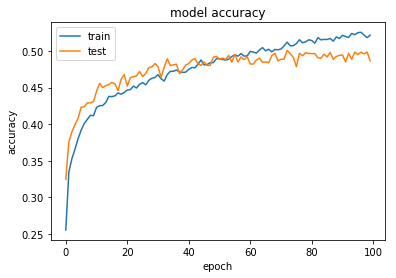

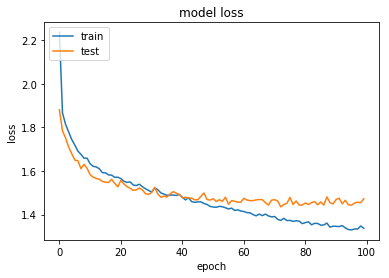

In [25]:
model13 = Sequential()
adam = optimizers.Adam()
model_13 = modelSelection_Dropout(model13, 10, adam)
modelEvaluation(model_13, 100)

Last but not least we are going to check Data Augmentation. More Specifically neural networks are known to need a lot of data to be able to train well.So we will train our model with more instances. It is usefull to prevent overfitting. We have to mention that we set batch size from 256 to 20 to check how the result will change in order to understand if we should have changed it earlier.

In [44]:
imdgen = ImageDataGenerator(
    featurewise_center = False,  
    samplewise_center = False,  
    featurewise_std_normalization = False,  
    samplewise_std_normalization = False,  
    zca_whitening = False,  
    rotation_range = 20,  
    width_shift_range = 0.1,  
    height_shift_range = 0.1,  
    horizontal_flip = True,  
    vertical_flip = False,  
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest'
)

In [45]:
imdgen.fit(X_train)
iterator = imdgen.flow(X_train, Y_train, batch_size=20) 

In [52]:
model14 = Sequential()
adam = optimizers.Adam()
model14.add(Flatten(input_shape=(32, 32, 3)))
model14.add(Dense(300, activation='relu'))
model14.add(Dense(128, activation='sigmoid'))
model14.add(Dense(10, activation='softmax'))
model14.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy']) 
modelFit = model14.fit_generator(imdgen.flow(X_train, Y_train, batch_size=20), samples_per_epoch=X_train.shape[0], nb_epoch=100, validation_data=(X_valid, Y_valid), verbose=0) 

/home/mscuser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/home/mscuser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=0, validation_data=(array([[[..., steps_per_epoch=1750, epochs=100)`
  


10000/10000 [==============================] - 1s     
('Loss: ', 1.4433707458496094)
('Accuracy', 0.48159999999999997)


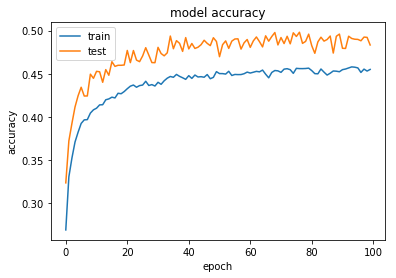

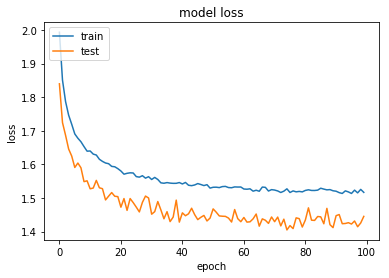

In [53]:
score = model14.evaluate(X_test, Y_test)
print('Loss: ', score[0])
print('Accuracy', score[1])
plots(modelFit)